<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy

In [1]:
import numpy as np

In [425]:
import matplotlib

In [427]:
%matplotlib inline

In [429]:
import matplotlib.pyplot as plt


# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

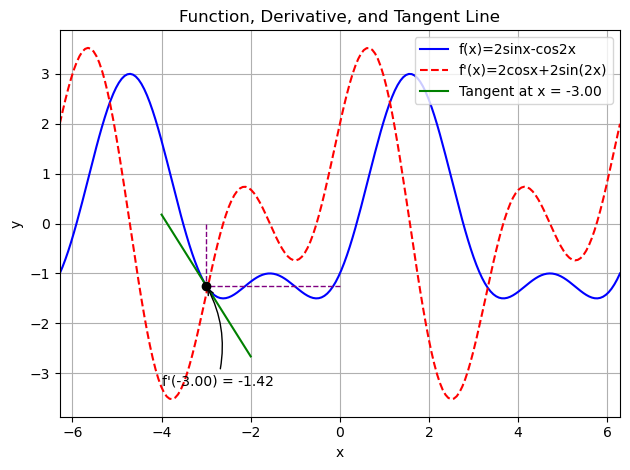

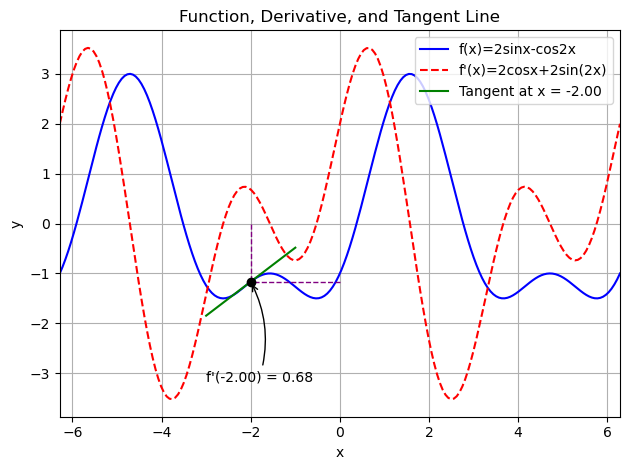

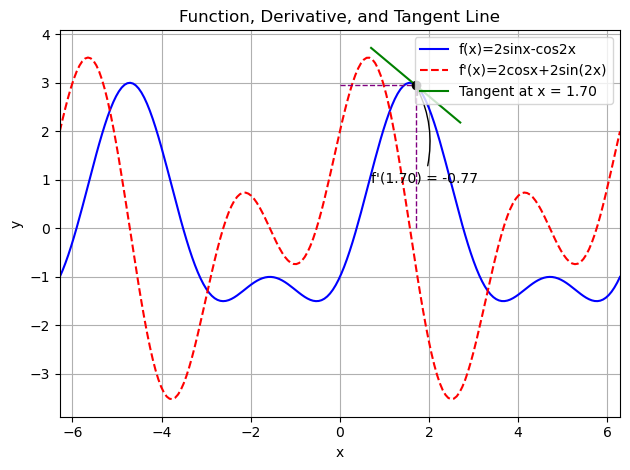

In [550]:
def beauty_derivative_plot(x):
    x_range = np.linspace(-2*np.pi, 2*np.pi, 200)
    f_x = 2*np.sin(x_range) - np.cos(2*x_range)
    f_der_x = 2*np.cos(x_range) + 2*np.sin(2*x_range)
    plt.plot(x_range, f_x,'b-', label='f(x)=2sinx-cos2x')
    plt.plot(x_range, f_der_x, 'r--', label="f'(x)=2cosx+2sin(2x)")

    x_tan_range = np.linspace(x - 1, x + 1, 100)
    f_x_tan = 2*np.sin(x) - np.cos(2*x)
    k = 2*np.cos(x) + 2*np.sin(2*x)
    tangent_line = f_x_tan + k*(x_tan_range - x)
    plt.plot(x_tan_range, tangent_line, 'g-', label = "Tangent at x = {:.2f}".format(x))

    plt.annotate(f"f'({x:.2f}) = {2*np.cos(x)+2*np.sin(2*x):.2f}", xy=(x, f_x_tan), xytext=(x - 1, f_x_tan - 2), arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    plt.scatter(x, f_x_tan, color='black', zorder=5)
    plt.vlines(x, 0, f_x_tan, colors='purple', linestyles='dashed', linewidth=1)
    plt.hlines(f_x_tan, 0, x, colors='purple', linestyles='dashed', linewidth=1)
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.margins(x=0)
    plt.tight_layout()
    plt.show()

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

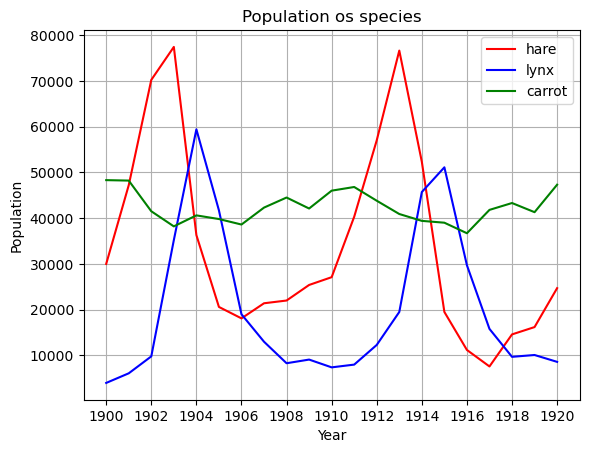

In [243]:
data = np.genfromtxt("populations.txt", delimiter='\t', skip_header=1)
plt.plot(data[:, 0], data[:, 1], 'r-', label = 'hare')
plt.plot(data[:, 0], data[:, 2], 'b-', label = 'lynx')
plt.plot(data[:, 0], data[:, 3], 'g-', label = 'carrot')
plt.xticks(np.arange(1900, 1921, 2))
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Population os species")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

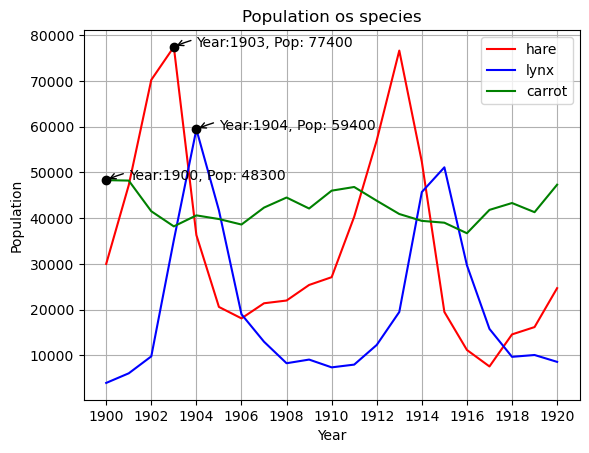

In [435]:
data = np.genfromtxt("populations.txt", delimiter='\t', skip_header=1)
plt.plot(data[:, 0], data[:, 1], 'r-', label = 'hare')
plt.plot(data[:, 0], data[:, 2], 'b-', label = 'lynx')
plt.plot(data[:, 0], data[:, 3], 'g-', label = 'carrot')

plt.scatter(data[np.argmax(data[:, 1]), 0], data[np.argmax(data[:, 1]), 1], color='black', zorder=5)
plt.scatter(data[np.argmax(data[:, 2]), 0], data[np.argmax(data[:, 2]), 2], color='black', zorder=5)
plt.scatter(data[np.argmax(data[:, 3]), 0], data[np.argmax(data[:, 3]), 3], color='black', zorder=5)

plt.annotate("Year:{}, Pop: {}".format(int(data[np.argmax(data[:, 1]), 0]), int(data[np.argmax(data[:, 1]), 1])),
             xy=(data[np.argmax(data[:, 1]), 0], data[np.argmax(data[:, 1]), 1]),
             xytext=(data[np.argmax(data[:, 1]), 0]+1, data[np.argmax(data[:, 1]), 1]),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate("Year:{}, Pop: {}".format(int(data[np.argmax(data[:, 2]), 0]), int(data[np.argmax(data[:, 2]), 2])),
             xy=(data[np.argmax(data[:, 2]), 0], data[np.argmax(data[:, 2]), 2]),
             xytext=(data[np.argmax(data[:, 2]), 0]+1, data[np.argmax(data[:, 2]), 2]),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate("Year:{}, Pop: {}".format(int(data[np.argmax(data[:, 3]), 0]), int(data[np.argmax(data[:, 3]), 3])),
             xy=(data[np.argmax(data[:, 3]), 0], data[np.argmax(data[:, 3]), 3]),
             xytext=(data[np.argmax(data[:, 3]), 0]+1, data[np.argmax(data[:, 3]), 3]),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.xticks(np.arange(1900, 1921, 2))
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Population os species")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

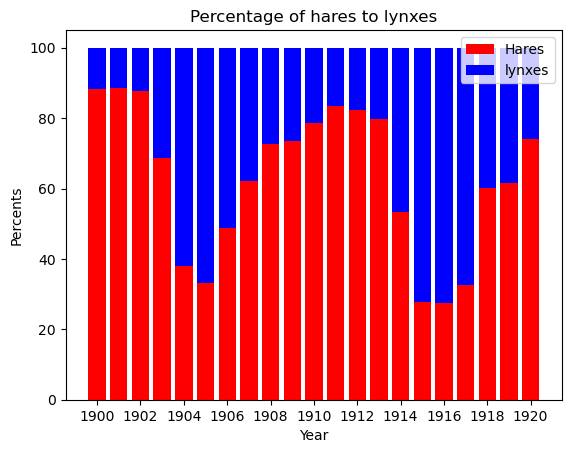

In [245]:
data = np.genfromtxt("populations.txt", delimiter='\t', skip_header=1)
plt.bar(data[:, 0], (data[:, 1]/(data[:, 1] + data[:, 2]))*100, color='r', label='Hares')
plt.bar(data[:, 0], (data[:, 2]/(data[:, 1] + data[:, 2]))*100, bottom=(data[:, 1]/(data[:, 1] + data[:, 2]))*100, color='b', label='lynxes')
plt.xticks(np.arange(1900, 1921, 2))
plt.title("Percentage of hares to lynxes")
plt.ylabel("Percents")
plt.xlabel("Year")
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

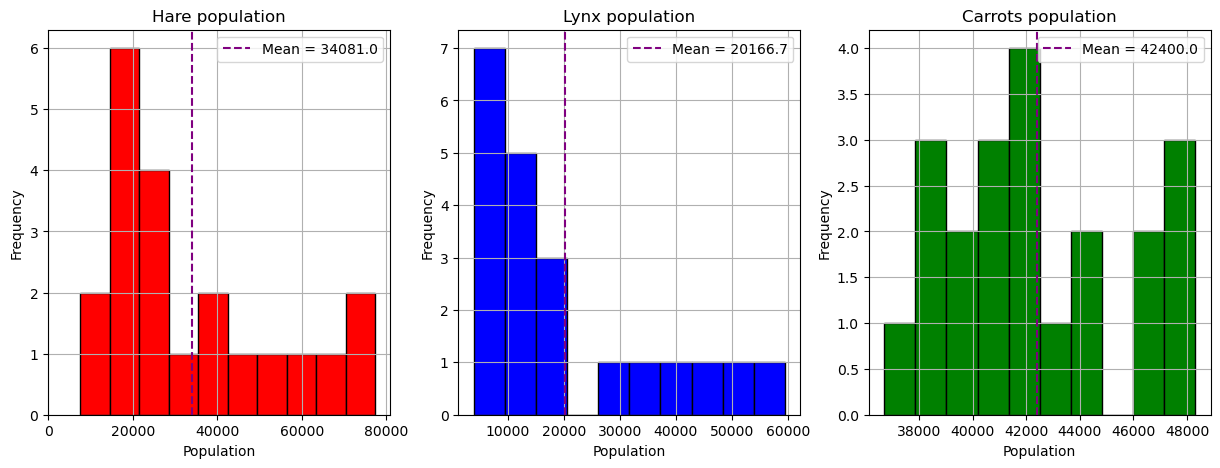

Mean value for the population of hares: 34081.0
Std for the population of hares: 20897.9
Mean value for the population of lynxes: 20166.7
Std for the population of lynxes: 16254.6
Mean value for the population of carrots: 42400.0
Std for the population of carrots: 3322.5


In [542]:
data = np.genfromtxt("populations.txt", delimiter='\t', skip_header=1)
plt.figure(figsize=(15, 5))

plt.subplot(131)
mean_hare = np.mean(data[:, 1])
std_hare = np.std(data[:, 1])
plt.hist(data[:, 1], color = 'r', edgecolor = 'black')
plt.axvline(mean_hare, color='purple', linestyle='--', label = "Mean = {:.1f}".format(mean_hare))
plt.xticks(np.arange(0, 90000, 20000))
plt.title('Hare population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.subplot(132)
mean_lynx = np.mean(data[:, 2])
std_lynx = np.std(data[:, 2])
plt.hist(data[:, 2], color = 'b', edgecolor = 'black')
plt.axvline(mean_lynx, color='purple', linestyle='--', label = "Mean = {:.1f}".format(mean_lynx))
plt.title('Lynx population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.subplot(133)
mean_carrots = np.mean(data[:, 3])
std_carrots = np.std(data[:, 3])
plt.hist(data[:, 3], color = 'g', edgecolor = 'black')
plt.axvline(mean_carrots, color='purple', linestyle='--', label = "Mean = {:.1f}".format(mean_carrots))
plt.title('Carrots population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.show()
print("Mean value for the population of hares: {:.1f}".format(mean_hare))
print("Std for the population of hares: {:.1f}".format(std_hare))
print("Mean value for the population of lynxes: {:.1f}".format(mean_lynx))
print("Std for the population of lynxes: {:.1f}".format(std_lynx))
print("Mean value for the population of carrots: {:.1f}".format(mean_carrots))
print("Std for the population of carrots: {:.1f}".format(std_carrots))

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

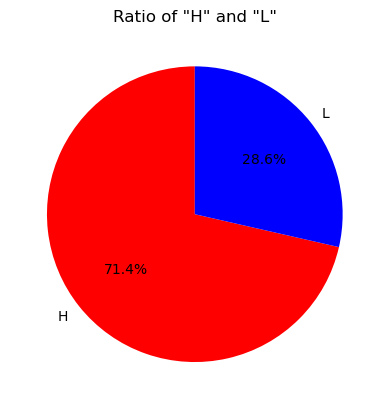

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


In [367]:
data_hares_lynxes = list(np.where(data[:, 1] > data [:, 2], 'H', 'L'))
unique, counts = np.unique(data_hares_lynxes, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', colors=['red', 'blue'], startangle=90)
plt.title('Ratio of "H" and "L"')
plt.show()
print(data_hares_lynxes)

Hares have the largest population

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

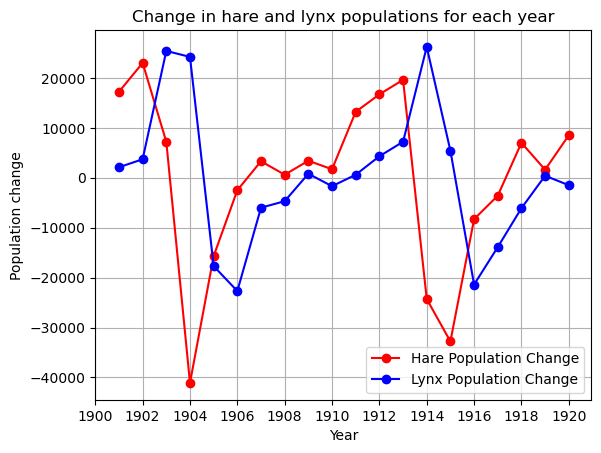

Correlation between hare population and lynx population: -0.1780


In [495]:
hare_change = np.diff(data[:, 1])
lynx_change = np.diff(data[:, 2])
years_change = data[:, 0][1:]
plt.plot(years_change, hare_change, 'r-o', label="Hare Population Change")
plt.plot(years_change, lynx_change, 'b-o', label="Lynx Population Change")
plt.xticks(np.arange(1900, 1921, 2))
plt.xlabel("Year")
plt.ylabel("Population change")
plt.title("Change in hare and lynx populations for each year")
plt.legend()
plt.grid(True)
plt.show()

print("Correlation between hare population and lynx population: {:.4f}".format(np.corrcoef(hare_change, lynx_change)[0, 1]))

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

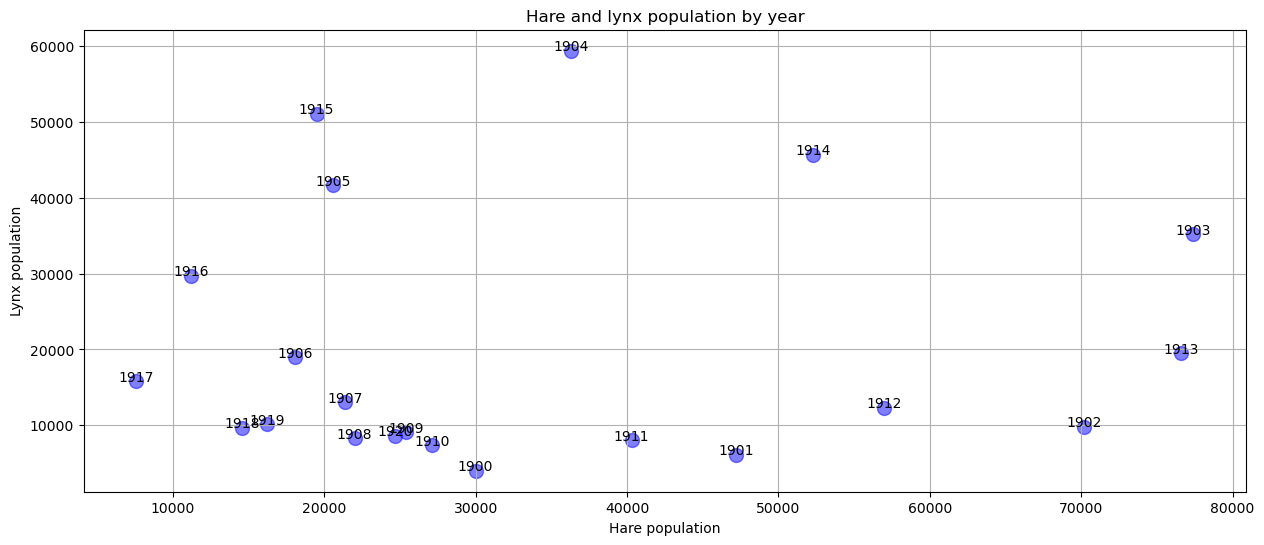

In [477]:
plt.figure(figsize=(15, 6))
plt.scatter(data[:, 1], data[:, 2], c='blue', alpha = 0.5, s=100)
years = data[:, 0].astype(int)
list(map(lambda x, y, years: plt.text(x, y, str(years), fontsize=10, ha='center'), data[:, 1], data[:, 2], years))
plt.xlabel('Hare population')
plt.ylabel('Lynx population')
plt.title('Hare and lynx population by year')

plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [420]:
indices = np.where((data[:, 0] == 1918) | (data[:, 0] == 1919))
estimated_hare_population = np.mean(data[indices, 1])
true_hare_population = data[np.argmin(data[:, 0] == 1920), 1]
error_ratio = np.abs(estimated_hare_population - true_hare_population) / true_hare_population
print("Estimated hare population in 1920: {}".format(estimated_hare_population))
print("True hare population in 1920: {}".format(true_hare_population))
print("Error ratio: {:.4f}".format(error_ratio))

Estimated hare population in 1920: 15400.0
True hare population in 1920: 30000.0
Error ratio: 0.4867


Найдем среднее значение популяции зайцев за 1918 и 1919 года, сравним его с реальным значением популяции за 1920 год и вычислим относительную ошибку.